# 10 DECISION TREE 

#### Objective:
- The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
#### Tasks:
- 1. Data Preparation:
    - Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [49]:
import pandas as pd  #import libraries 
import numpy as np

df = pd.read_excel("heart_disease.xlsx", sheet_name=1) #Load Dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


#### 2. Exploratory Data Analysis (EDA):
- Perform exploratory data analysis to understand the structure of the dataset.

In [50]:
df.shape # checking shape of dataset

(908, 13)

In [3]:
df.info() # Info About Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [51]:
df.describe().T # Statistical Summary Of dataset

,count,mean,std,min,25%,50%,75%,max
age,908.0,53.791850,9.158031,29.0,47.75,54.0,60.0,77.0
trestbps,908.0,133.430617,20.401608,0.0,120.00,130.0,144.0,200.0
chol,908.0,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
thalch,908.0,135.957048,26.804929,60.0,118.00,138.0,156.0,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.5,6.2
num,908.0,1.008811,1.144436,0.0,0.00,1.0,2.0,4.0


- Check for missing values, outliers, and inconsistencies in the data.

In [5]:
df.duplicated().value_counts() # Check Duplicate Raws In DataSet

False    907
True       1
Name: count, dtype: int64

In [6]:
df.drop_duplicates(inplace = True) # remove Duplicate Raws

In [7]:
df.duplicated().sum() # Again Check Duplicate 

0

In [8]:
df.isnull().sum() #Checking Null Values in Each Columns  

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
df.fillna(df['oldpeak'].mean(), inplace=True) # Fill Null Values With Mean

In [10]:
df.isnull().sum() # Again Check Null Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

- Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

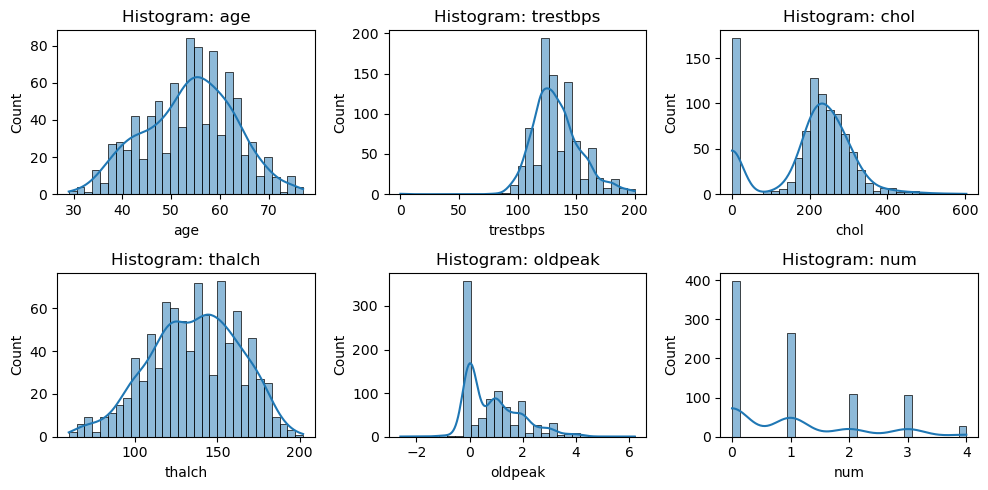

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist() #Find Numerical Columns 
plt.figure(figsize=(10,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3, i)
    sns.histplot(df[col], kde=True, bins=30) #Plot Histplot Of Each Numerical Columns TO identify Features Distributions
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

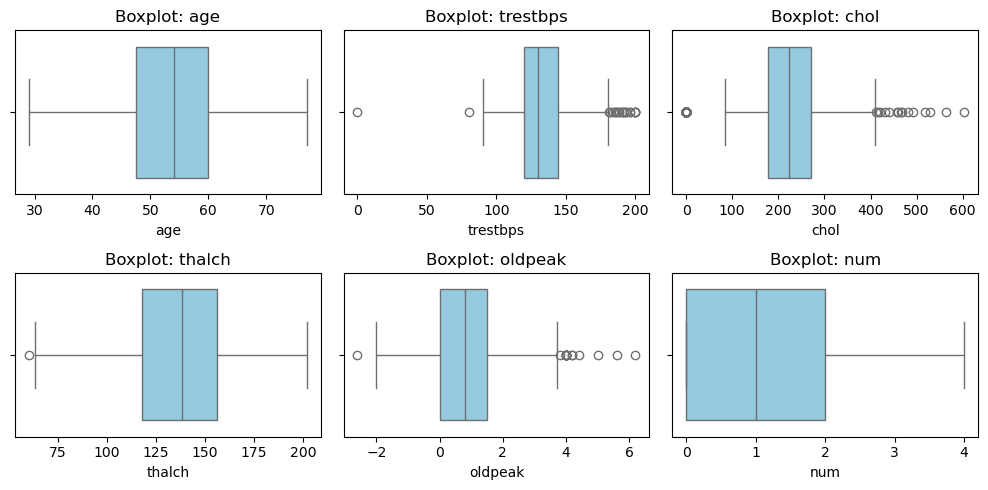

In [13]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color="skyblue")  #Plot Boxplot For Outlier Detection 
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

##### 3. Feature Engineering:
- If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [14]:
df.dtypes #Check Dtypes 

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [15]:
df['fbs'] = df['fbs'].astype(int) #Change Dtype into int from Bool 

In [16]:
from sklearn.preprocessing import LabelEncoder #import Label Encoder
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns #Only Approve Categorical Column (Columns With String Dtypes)
for col in cat_cols:
     df[col] = le.fit_transform(df[col].astype(str)) # Encoding 
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0


In [17]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: max(min(x, upper_bound), lower_bound)) # capping For handel Outliers 

print(df.shape)
print("It is not needed For This Specific Model B'cuz Trees Are Not Work On Distance, But Still Im Preforming This Step Here ")

(907, 13)
It is not needed For This Specific Model B'cuz Trees Are Not Work On Distance, But Still Im Preforming This Step Here 


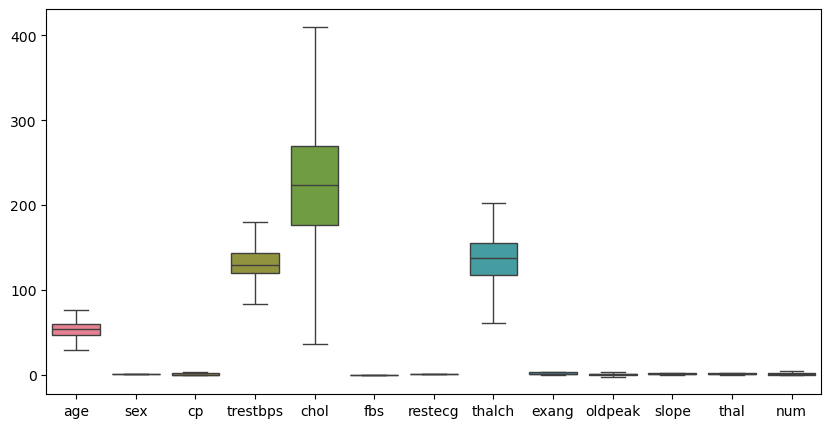

In [18]:
plt.figure(figsize = (10,5))
sns.boxplot(df) #Plot Boxplot For Check Outliers Again 
plt.show()

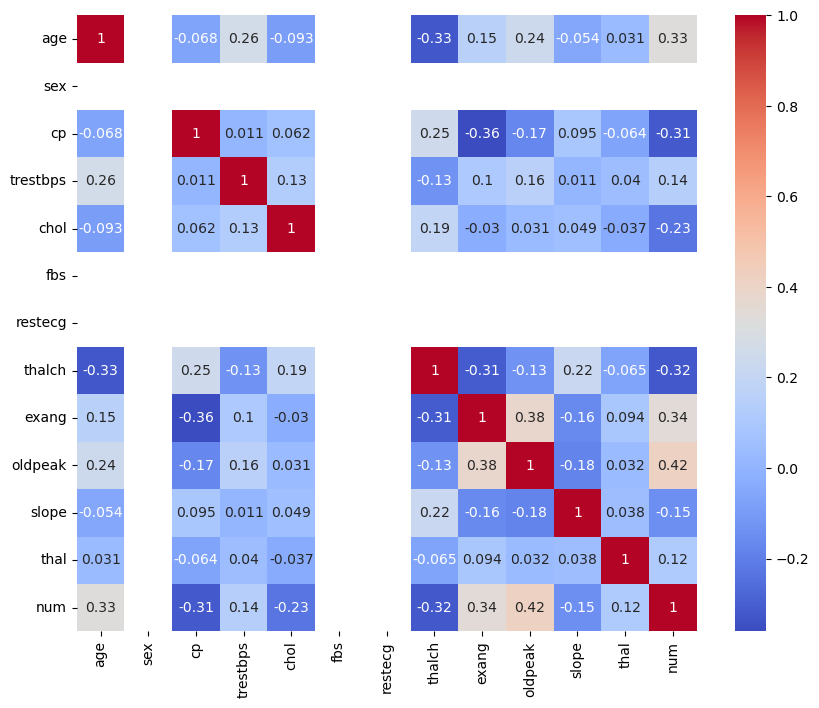

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm',) 
plt.show() #Ploting Heatmap for check correlations Between Features to prevent From multicollinearity Problem

##### 4. Decision Tree Classification:
- Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [20]:
x = df.drop('num', axis=1) # Splitting Data Into X And Y 
y = df['num']

<Axes: xlabel='num', ylabel='count'>

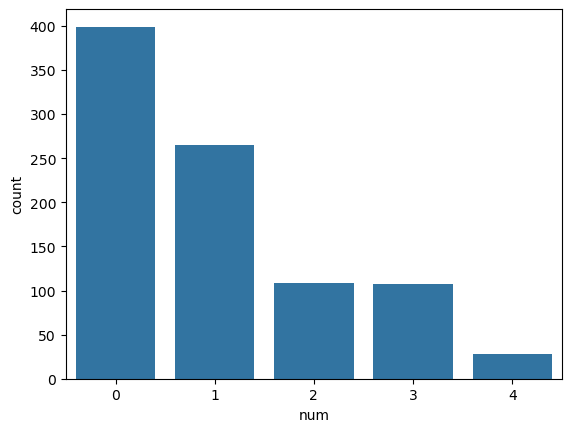

In [21]:
sns.countplot(x = y) # ploting Countplot For Check target Feature is Balance Or Imbalance 

In [22]:
from sklearn.preprocessing import StandardScaler #import Standard Scaler, Again it's not needed for trees b'cuz trees are not work on distance 
ss = StandardScaler()  
x_sc = ss.fit_transform(x) # Scaling X 

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=42, stratify=y,) 
#Using Stratified Train test split b'cuz of imbalance data

- Implement a Decision Tree Classification model using a library like scikit-learn.

In [24]:
from sklearn.tree import DecisionTreeClassifier #import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(x_train, y_train) #Train Model

In [25]:
y_pred = model.predict(x_test) #model making predictions for test data

- Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [26]:
model.score(x_train, y_train) #Checking model's performance on tranning data

1.0

In [27]:
model.score(x_test, y_test) #Checking model's performance on Testing data

0.4725274725274725

In [28]:
from sklearn.metrics import classification_report , confusion_matrix, f1_score, recall_score, precision_score, roc_curve,roc_auc_score #import metrics

recall = recall_score(y_test, y_pred, average='weighted') #Calculate Weighted Recall Score
print("Weighted Recall:", np.round(recall, 2))

precision = precision_score(y_test, y_pred, average='weighted') # Calculate Weighted precision
print("Weighted Precision:", np.round(precision, 2))

f1 = f1_score(y_test, y_pred, average='weighted') # Calculate Weighted F1-score
print("Weighted F1-score:", np.round(f1, 2))


cm = confusion_matrix(y_test,y_pred) #For Cunfusion matrix
cm

Weighted Recall: 0.47
Weighted Precision: 0.48
Weighted F1-score: 0.48


array([[56, 15,  7,  2,  0],
       [11, 19, 14,  8,  1],
       [ 5, 10,  4,  3,  0],
       [ 4,  6,  4,  7,  0],
       [ 0,  2,  1,  3,  0]], dtype=int64)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72        80
           1       0.37      0.36      0.36        53
           2       0.13      0.18      0.15        22
           3       0.30      0.33      0.32        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.48      0.47      0.48       182

AUC ROC Score is meaning Less For Multiclass Classification Problem So That's Why I'm Not Plotting Here 


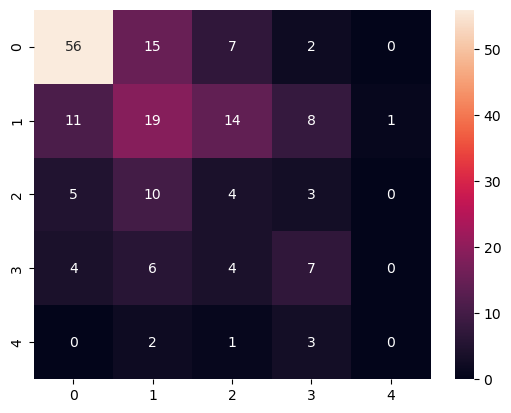

In [29]:
sns.heatmap(cm, annot=True) #Ploting Heatmap For Confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred)) #Classification Report
print("AUC ROC Score is meaning Less For Multiclass Classification Problem So That's Why I'm Not Plotting Here ")

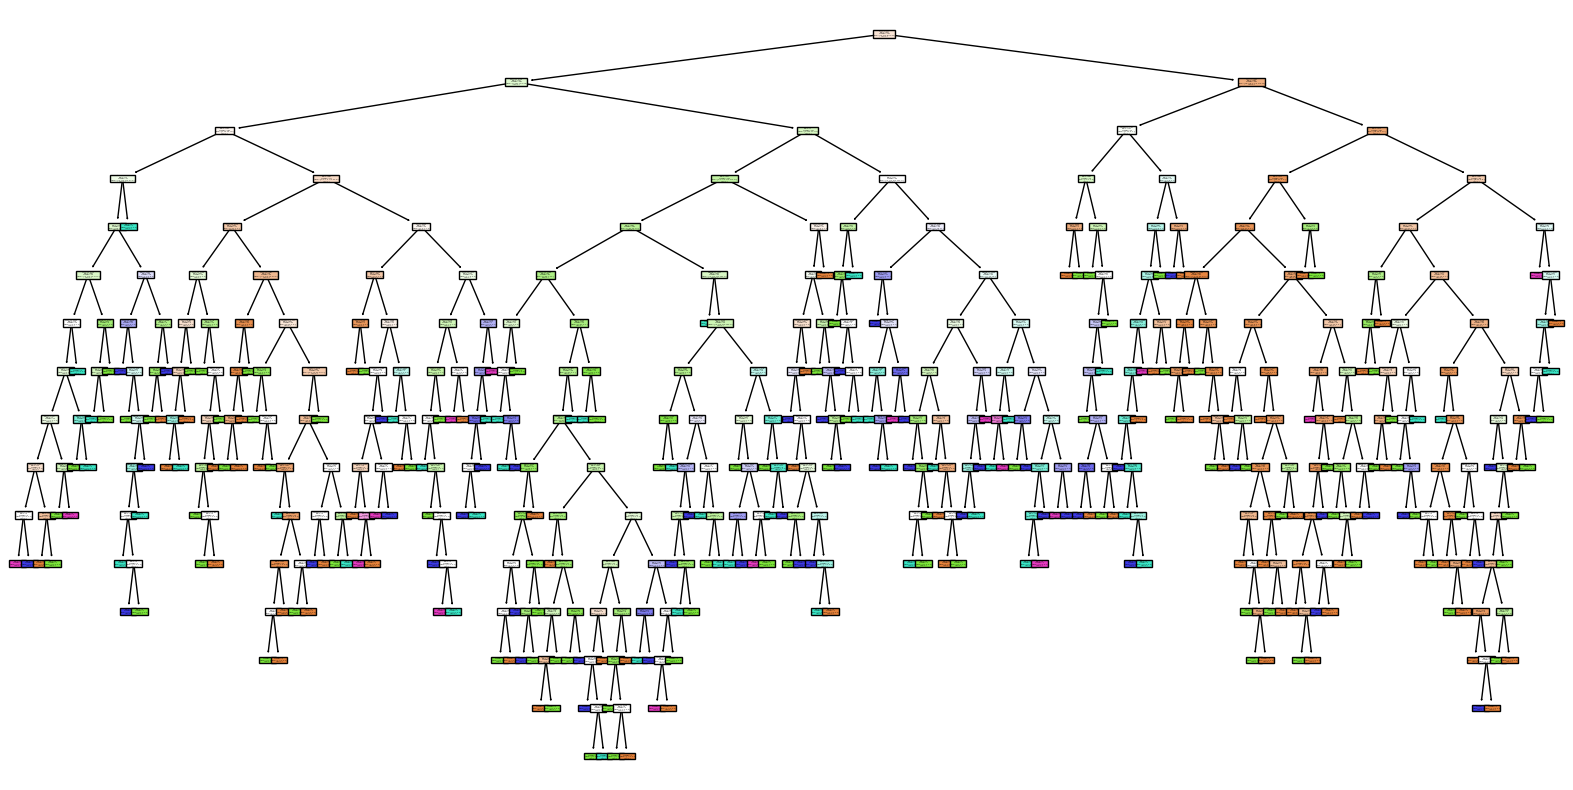

In [30]:
from sklearn.tree import plot_tree 
fnames = x.columns
plt.figure(figsize=(20,10))
plot_tree(model, class_names=['0','1','2','3','4'], feature_names=fnames, filled=True)
plt.show() #plotting Decision Tree

In [31]:
importances = pd.Series(model.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)
print("Feature Importance:\n", importances) # Checking Importance of Features according to this model 

Feature Importance:
 thalch      0.168945
chol        0.157956
age         0.156785
cp          0.131011
trestbps    0.127670
oldpeak     0.111582
thal        0.063273
slope       0.042996
exang       0.039783
sex         0.000000
fbs         0.000000
restecg     0.000000
dtype: float64


##### 5. Hyperparameter Tuning:
- Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


In [32]:
df1 = df.copy() 
#Making New Feature from num feature it will convert 5 categories to only 2 categories (b'cuz Prediction goal is usually disease vs no diseas') 
df1['num_binary'] = (df1['num'] > 0).astype(int) 
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,num_binary
0,63,1.0,3,145.0,233.0,0.0,1.0,150.0,1,2.3,0,0,0,0
1,41,1.0,1,135.0,203.0,0.0,1.0,132.0,1,0.0,1,0,0,0
2,57,1.0,0,140.0,192.0,0.0,1.0,148.0,1,0.4,1,0,0,0
3,52,1.0,3,118.0,186.0,0.0,1.0,190.0,1,0.0,1,0,0,0
4,57,1.0,0,110.0,201.0,0.0,1.0,126.0,3,1.5,1,0,0,0


In [33]:
x1 = df1.iloc[:,:-2] #Again Split data into X And Y 
y1 = df1["num_binary"]
x1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1.0,3,145.0,233.0,0.0,1.0,150.0,1,2.3,0,0
1,41,1.0,1,135.0,203.0,0.0,1.0,132.0,1,0.0,1,0
2,57,1.0,0,140.0,192.0,0.0,1.0,148.0,1,0.4,1,0
3,52,1.0,3,118.0,186.0,0.0,1.0,190.0,1,0.0,1,0
4,57,1.0,0,110.0,201.0,0.0,1.0,126.0,3,1.5,1,0


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 907, dtype: int64

<Axes: xlabel='num_binary', ylabel='count'>

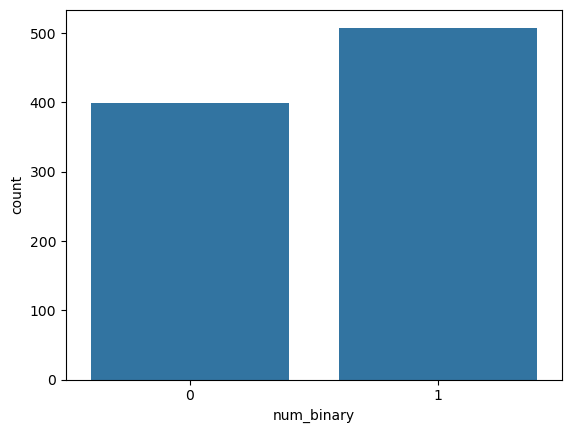

In [35]:
sns.countplot(x = y1) #Countplot For Check Data is Balance or not

In [36]:
from sklearn.model_selection import train_test_split 
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify=y) #Train test Split 

In [37]:
from sklearn.model_selection import GridSearchCV #import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
} #Parameters Grid 
grid = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'),param_grid,cv=5) #Find best hyperparameters
grid.fit(x1_train, y1_train) #Train model

best_tree = grid.best_estimator_ 

In [38]:
from sklearn.model_selection import KFold , cross_validate, cross_val_score
kfold = KFold(n_splits = 5) #KFold and cross Validation to check consistency of model  

In [39]:
results = cross_validate(best_tree,x1,y1, cv=kfold, scoring = 'f1_weighted', return_train_score=True)
results # check Result of Cross validation

{'fit_time': array([0.01456094, 0.01003695, 0.01957846, 0.        , 0.01804352]),
 'score_time': array([0.00272822, 0.00526547, 0.        , 0.01346183, 0.00478792]),
 'test_score': array([0.8625    , 0.88      , 0.69580515, 0.82084691, 0.91291291]),
 'train_score': array([0.80900478, 0.81184521, 0.84969831, 0.83204341, 0.80338173])}

In [40]:
print('Model Train Score',results['train_score'].mean()) #mean Of weighted F1 score on Tranning Data
print('Model Test Score',results['test_score'].mean()) #mean Of weighted F1 score on Ttesting Data

Model Train Score 0.8211946885587631
Model Test Score 0.8344129929193072


In [41]:
best_tree.fit(x1_train, y1_train) #train best model according gridsearchCV 

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, random_state=42)

In [42]:
cv_pred = best_tree.predict(x1_test) #model makes predictions 

##### 6. Model Evaluation and Analysis:
- Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [43]:
best_tree.score(x1_train, y1_train)   #Checking model's performance on tranning data

0.8289655172413793

In [44]:
best_tree.score(x1_test, y1_test)  #Checking model's performance on testing data

0.7252747252747253

In [45]:
recall = recall_score(y1_test, cv_pred, average='weighted') #Calculate Weighted Recall Score
print("Weighted Recall:", np.round(recall, 2))

precision = precision_score(y1_test, cv_pred, average='weighted') # Calculate Weighted precision
print("Weighted Precision:", np.round(precision, 2))

f1 = f1_score(y1_test, cv_pred, average='weighted') # Calculate Weighted F1-score
print("Weighted F1-score:", np.round(f1, 2))


auc_score = roc_auc_score(y1_test, cv_pred, average='weighted') # Calculate Weighted AUC Score
print(f"Weighted AUC Score : {auc_score}")

cm = confusion_matrix(y1_test,cv_pred) #For Cunfusion matrix
cm

Weighted Recall: 0.73
Weighted Precision: 0.72
Weighted F1-score: 0.72
Weighted AUC Score : 0.7171568627450979


array([[52, 28],
       [22, 80]], dtype=int64)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.68        80
           1       0.74      0.78      0.76       102

    accuracy                           0.73       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.73      0.72       182



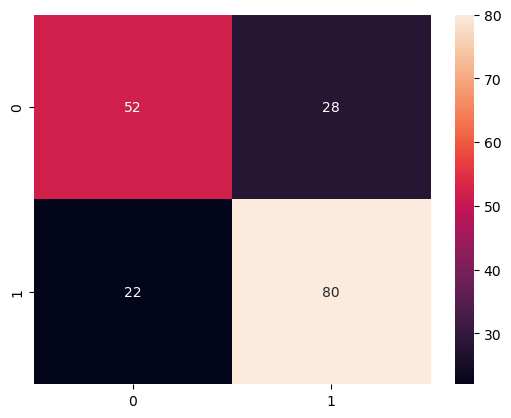

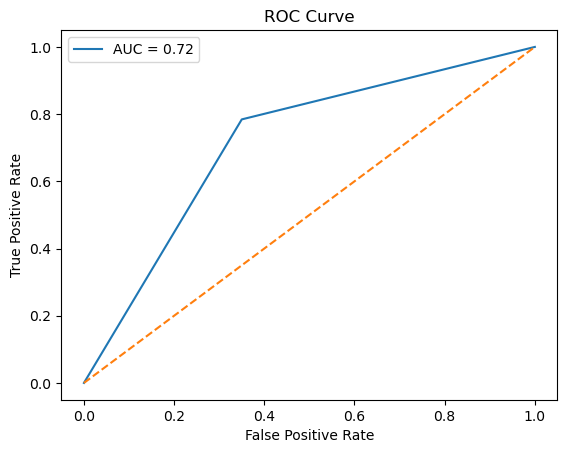

In [46]:
sns.heatmap(cm, annot=True) #Ploting Heatmap for Confusion matrix

print("Classification Report:\n", classification_report(y1_test, cv_pred)) # Classification Report Of model 

auc_score = roc_auc_score(y1_test, cv_pred)
fpr, tpr, _ = roc_curve(y1_test, cv_pred)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  #For Plot AUC ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

- Visualize the decision tree structure to understand the rules learned by the model and identify important features

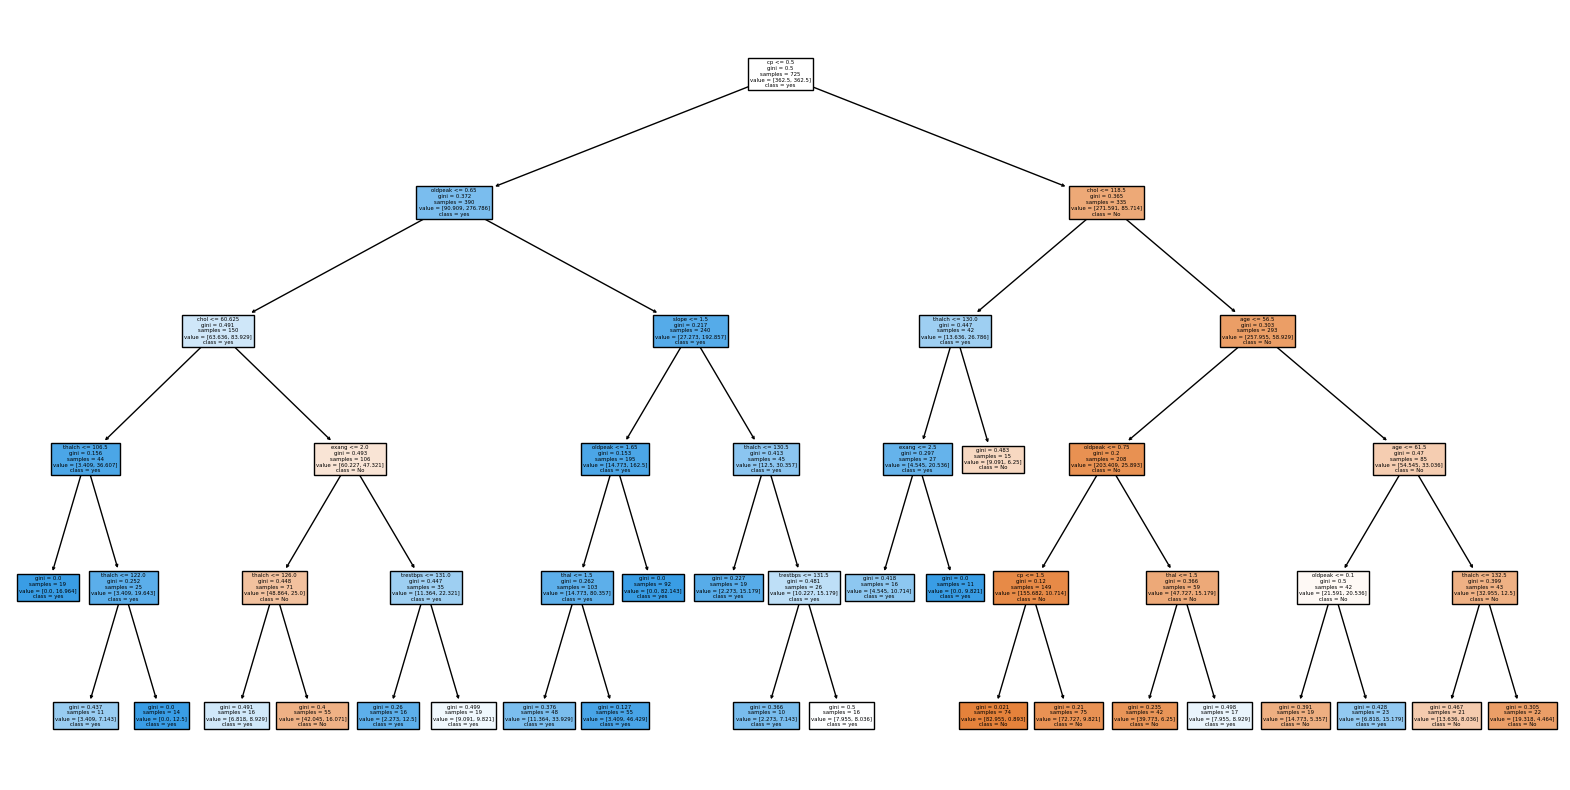

In [47]:
from sklearn.tree import plot_tree
fnames = x1.columns
plt.figure(figsize=(20,10)) 
plot_tree(best_tree, class_names=['No','yes'], feature_names=fnames, filled=True) #Plot Decision Tree
plt.show()

In [48]:
importances = pd.Series(best_tree.feature_importances_, index=x1.columns)
importances = importances.sort_values(ascending=False) #checking important features according to model 
print("Feature Importance:\n", importances)

Feature Importance:
 cp          0.511941
chol        0.156506
oldpeak     0.135292
age         0.057553
thalch      0.049057
exang       0.031486
thal        0.028688
slope       0.015926
trestbps    0.013551
sex         0.000000
fbs         0.000000
restecg     0.000000
dtype: float64


### Interview Questions:
- 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

###### max_depth
- Limits the depth of the tree.
    - Smaller depth reduces overfitting; larger depth may overfit.

###### min_samples_split
- Minimum samples required to split a node.
    - Higher value makes the tree more general.

###### min_samples_leaf
- Minimum samples required at a leaf node.
    - Helps smooth predictions and reduces overfitting.

###### criterion (gini, entropy)
- Measure used to split nodes.
    - Affects how splits are chosen.

###### class_weight
- Weights classes during training.
    - Useful for handling imbalanced datasets.

- 2. What is the difference between the Label encoding and One-hot encoding?

###### Label Encoding :
- Label Encoding converts categorical variables into numerical labels by assigning a unique integer to each category, such as Red=0, Blue=1, Green=2, all within a single column. It's efficient for memory and ideal for ordinal data with inherent order (e.g., low/medium/high ratings). Tree-based models like Decision Trees and Random Forests handle it naturally without assuming false hierarchies. However, for nominal data like colors, it risks implying unintended ordinal relationships, potentially misleading distance-based algorithms like KNN or SVM.

###### One-Hot Encoding (75 words):
- One-Hot Encoding transforms each category into a binary vector with a separate column per unique value; e.g., Red becomes, Blue. This avoids any ordinal assumptions, making it perfect for nominal data like city names or colors. It's preferred for linear models, logistic regression, and neural networks that treat features independently. Drawbacks include the curse of dimensionality with many categories, leading to sparse matrices and higher computational costs—use sparse representations or dimensionality reduction if needed.